First 5 rows of the dataset:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop Pro 17,West,1200,200,0.05,Electronics,01-05-2025
1,Office Chair,East,300,50,0.10,Furniture,02-05-2025
2,Wireless Mouse,North,25,5,0.00,Accessories,03-05-2025
3,"Monitor 24""",South,200,40,0.07,Electronics,04-05-2025
4,Desk Lamp,West,45,10,0.00,Furniture,05-05-2025



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   20 non-null     object 
 1   Region    20 non-null     object 
 2   Sales     20 non-null     int64  
 3   Profit    20 non-null     int64  
 4   Discount  20 non-null     float64
 5   Category  20 non-null     object 
 6   Date      20 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB

Statistical Summary:


,Sales,Profit,Discount
count,20.000000,20.000000,20.000000
mean,214.500000,40.050000,0.036000
std,267.306546,44.797174,0.031523
min,18.000000,4.000000,0.000000
25%,43.750000,9.500000,0.000000
50%,165.000000,32.500000,0.035000
75%,270.000000,50.000000,0.060000
max,1200.000000,200.000000,0.100000


Number of duplicate rows: 0
Missing values before cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64
Missing values after cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Data after cleaning:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop Pro 17,West,1200,200,0.05,Electronics,2025-05-01
1,Office Chair,East,300,50,0.10,Furniture,2025-05-02
2,Wireless Mouse,North,25,5,0.00,Accessories,2025-05-03
3,"Monitor 24""",South,200,40,0.07,Electronics,2025-05-04
4,Desk Lamp,West,45,10,0.00,Furniture,2025-05-05


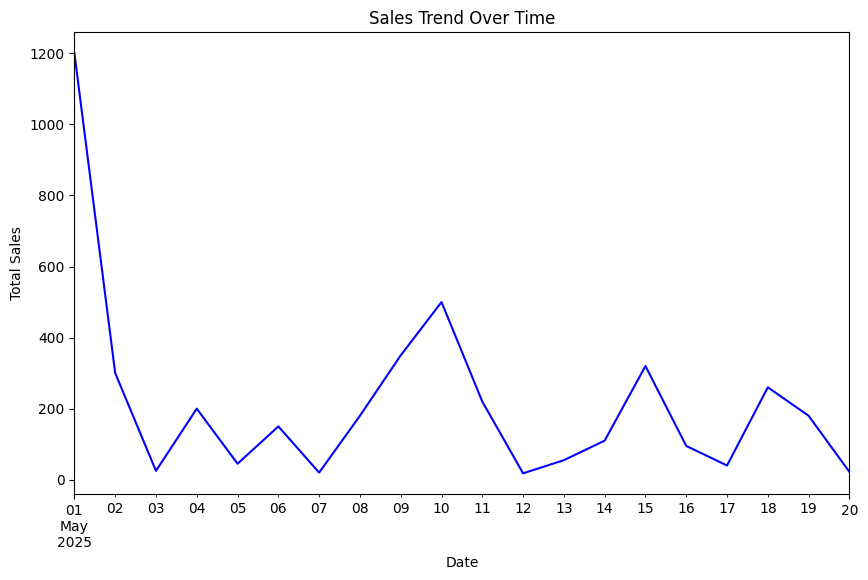

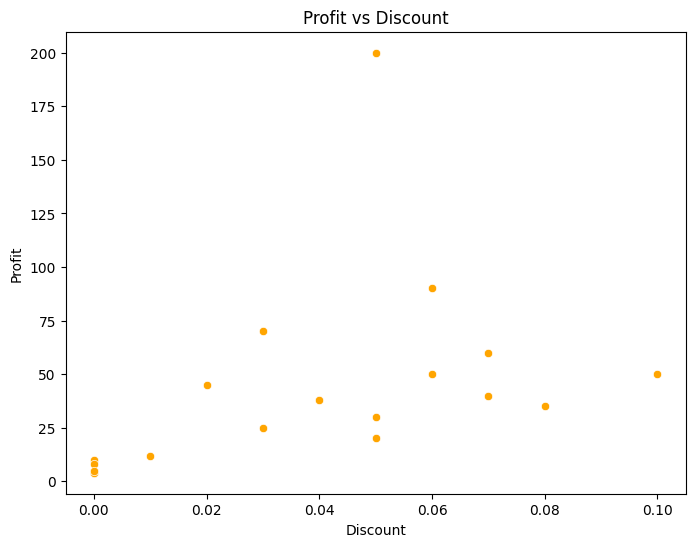

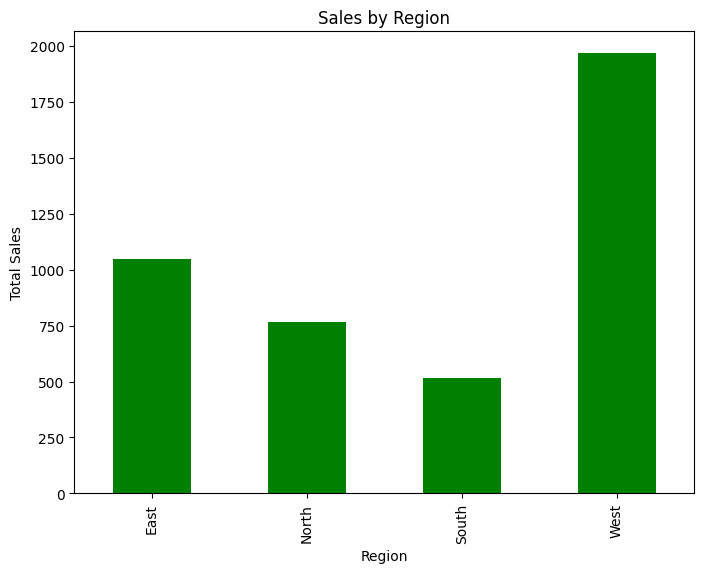

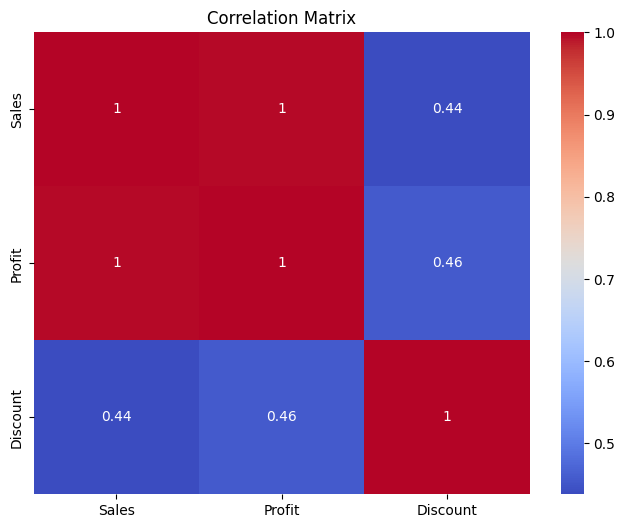

Mean Squared Error: 4807.89
R-squared Score: 0.97


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sales_data.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nDataset Information:")
df.info()

# Statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

# Fill missing numerical values with column mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(f"Missing values after cleaning:\n{df.isnull().sum()}")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Verify the changes
print("\nData after cleaning:")
display(df.head())

# Plot sales trends over time
plt.figure(figsize=(10, 6))
df.groupby('Date')['Sales'].sum().plot(kind='line',color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Scatter plot: Profit vs Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount',y='Profit',data=df,color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Sales distribution by region
plt.figure(figsize=(8, 6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar',color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Profit','Discount']]
y = df['Sales']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test,y_pred):.2f}")